# Sequential Data Analysis

In [22]:
from pandas import read_csv
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime
from pandas.tools.plotting import autocorrelation_plot

def parser(x):
    return pd.datetime.strptime(x, '%d/%m/%y %H')

data1 = read_csv('../data/BATADAL_dataset03.csv', header=0, parse_dates=[0], index_col=0, squeeze=True,\
                  date_parser=parser)

data2 = read_csv('../data/BATADAL_dataset04.csv', header=0, parse_dates=[0], index_col=0, squeeze=True,\
                  date_parser=parser)

testset = read_csv('../data/BATADAL_test_dataset.csv', header=0, parse_dates=[0], index_col=0, squeeze=True,\
                  date_parser=parser)

series1 = data1.copy()

date = data1.index.copy()
testset.index = range(len(testset))

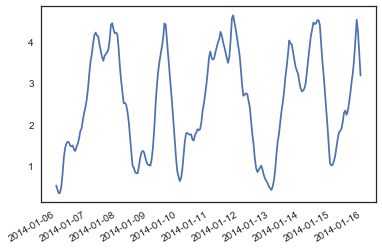

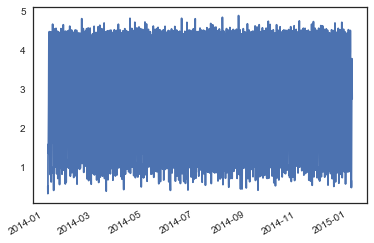

/Users/lizy/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:16: FutureWarning: 'pandas.tools.plotting.autocorrelation_plot' is deprecated, import 'pandas.plotting.autocorrelation_plot' instead.
  app.launch_new_instance()


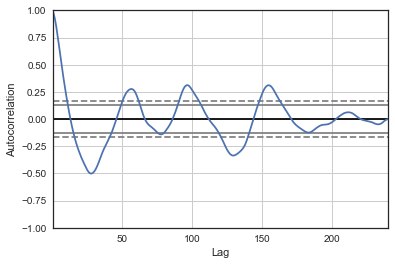

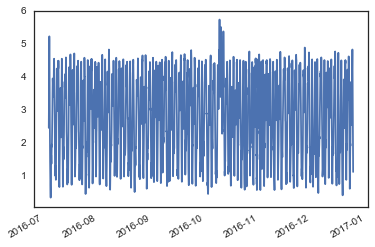

/Users/lizy/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:29: FutureWarning: 'pandas.tools.plotting.autocorrelation_plot' is deprecated, import 'pandas.plotting.autocorrelation_plot' instead.


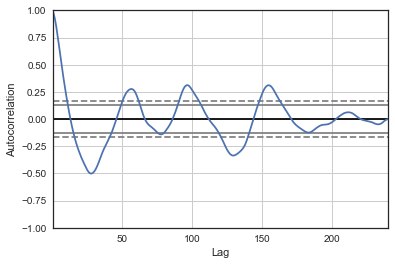

In [34]:
plt.figure()
a = data1.iloc[:,0][:240]
plt.plot(a)
plt.gcf().autofmt_xdate()
plt.savefig('d1_detail.png', dpi=300, bbox_inches='tight')
plt.show()


plt.plot(data1.iloc[:,0])
plt.gcf().autofmt_xdate()
plt.savefig('d1_show.png', dpi=300, bbox_inches='tight')
plt.show()


plt.figure()
autocorrelation_plot(a)
plt.savefig('d1_auto.png', dpi=300, bbox_inches='tight')
plt.show()


plt.figure()
plt.plot(data2.iloc[:,0])
plt.gcf().autofmt_xdate()
plt.savefig('d2_show.png', dpi=300, bbox_inches='tight')
plt.show()


plt.figure()
autocorrelation_plot(a)
plt.show()

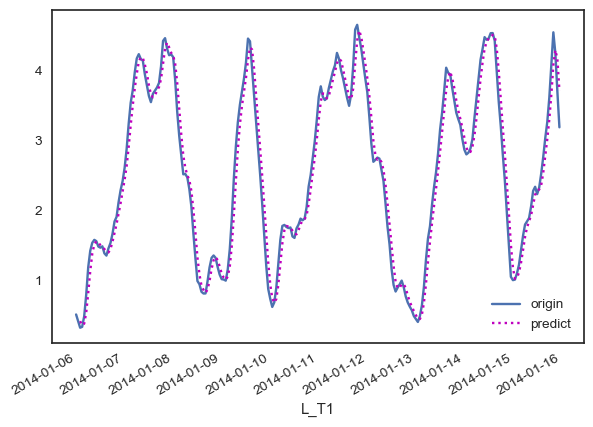

In [35]:
#print(series.head())

import matplotlib.dates as mdates

idx = 0
a = data1.iloc[:,idx][:240]
# Tail-rolling average transform
rolling = a.rolling(window=3)
rolling_mean = rolling.mean()
plt.figure(figsize=(7,5),dpi=98)
plt.plot(a.index, a.values,label='origin')
plt.plot(a.index,rolling_mean,'m:',label='predict')
plt.legend()
plt.gcf().autofmt_xdate()
#  myFmt = mdates.DateFormatter('%d/%m %H:%M')
#  plt.gca().xaxis.set_major_formatter(myFmt)
#  plt.xlim(date.values[:100])
plt.xlabel(str(data1.columns.values[idx]))
plt.savefig('d1_predict.png', dpi=300, bbox_inches='tight')
plt.show()



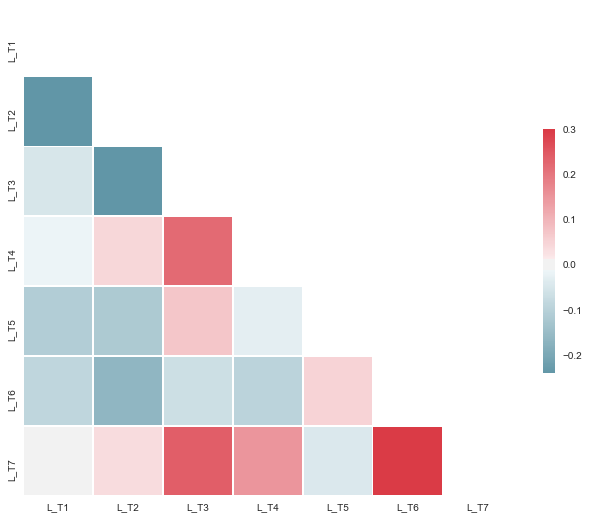

In [30]:
import seaborn as sns

sns.set(style="white")
corr = data1.iloc[:,:7].corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))
# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.savefig('cor.png', dpi=300, bbox_inches='tight')

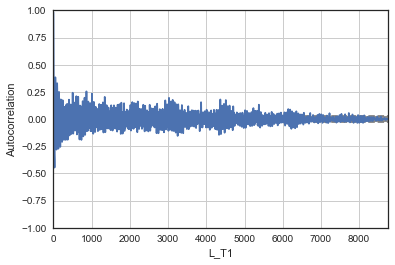

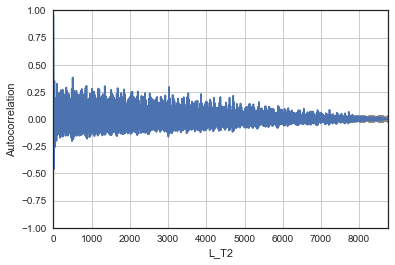

In [38]:
from pandas.plotting import autocorrelation_plot

for i in range(2):
    a = data.iloc[:,i]
    autocorrelation_plot(a)
    plt.xlabel(str(data.columns.values[i]))
    plt.show()